In [1]:
import csv
import cv2
import numpy as np
import sklearn
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


In [2]:
def read_image(source_path):
    filename = source_path.split('/')[-1]
    current_path = '/home/yue/CarND-Behavioral-Cloning/Training_data2/IMG/' + filename
    image = cv2.imread(current_path)
    converted_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return converted_image





In [3]:
!pwd

/home/yue/CarND-Behavioral-Cloning


In [4]:
lines = []
with open('/home/yue/CarND-Behavioral-Cloning/Training_data2/driving_log.csv') as csvfile:
    reader = csv.reader(csvfile)
    for line in reader:
        lines.append(line)
    

11588


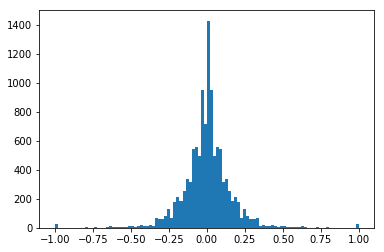

In [5]:
steers= []
count = 0


for line in lines[:]:
    steer = float(line[3])
    
    steers.append(steer)   
    steers.append(-steer)
    '''
    steers.append(steer + 0.2)
    steers.append(steer - 0.2)
    steers.append(-(steer + 0.2))
    steers.append(-(steer - 0.2))
    
    if(abs(steer - 0.0) > 1e-2):
        steers.append(steer)
        steers.append(-steer)
        steers.append(steer + 0.2)
        steers.append(steer - 0.2)
        steers.append(-(steer + 0.2))
        steers.append(-(steer - 0.2))
    else:
        if(count < 500):
            count += 1
            steers.append(steer)
            steers.append(-steer)
            steers.append(steer + 0.2)
            steers.append(steer - 0.2)
            steers.append(-(steer + 0.2))
            steers.append(-(steer - 0.2))
        else:
            count = 600
    '''

    
    
print(len(steers))   

n, bins, patches = plt.hist(steers, 100)

#print(n)
#print(bins)

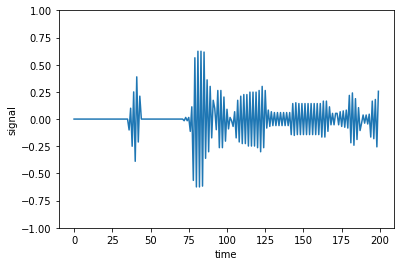

In [6]:

plt.plot(steers[0:200]);
plt.xlabel('time')
plt.ylabel('signal')
plt.ylim(-1,1);

(160, 320, 3)


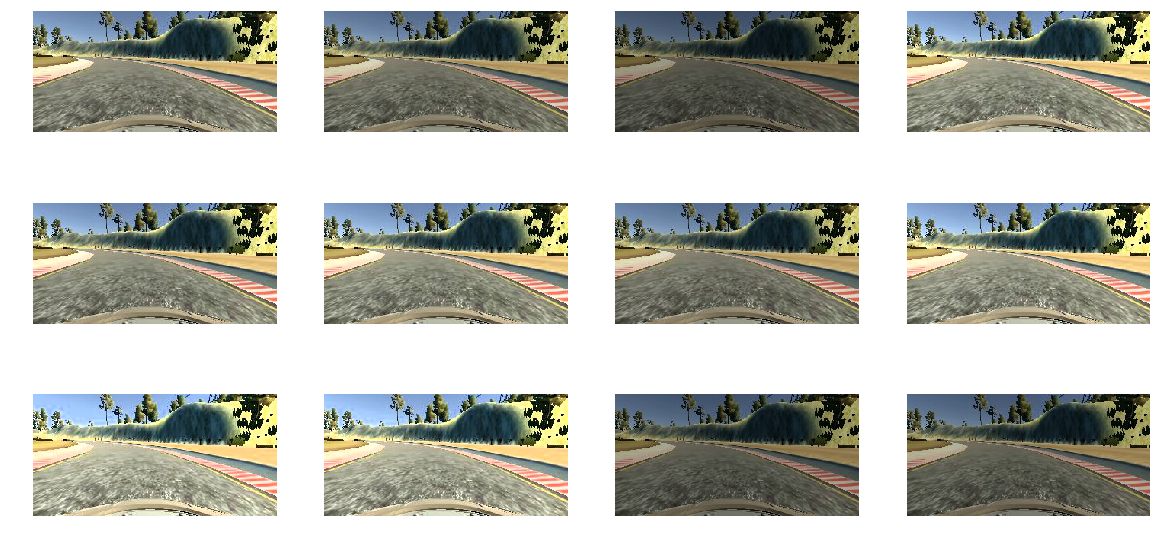

In [11]:
def brightness_image(image):
    image_tmp = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)
    image_tmp = np.array(image_tmp, dtype = np.float64)
    random_bright = .5+np.random.uniform()
    image_tmp[:,:,2] = image_tmp[:,:,2]*random_bright
    image_tmp[:,:,2][image_tmp[:,:,2]>255]  = 255
    image_tmp = np.array(image_tmp, dtype = np.uint8)
    image_tmp = cv2.cvtColor(image_tmp,cv2.COLOR_HSV2RGB)
    
    return image_tmp


plt.figure(figsize=(20,10))
plt.subplot(3,4,1)
plt.imshow(images_center[0])
print(images_center[0].shape)
plt.axis('off')
for i in range(1,12):
    plt.subplot(3,4,i+1)
    plt.imshow(brightness_image(images_center[0]))
    plt.axis('off')
    





In [8]:
images_center = []
images_left = []
images_right = []
for line in lines:
    images_center.append(read_image(line[0]))
    images_left.append(read_image(line[1]))
    images_right.append(read_image(line[2]))

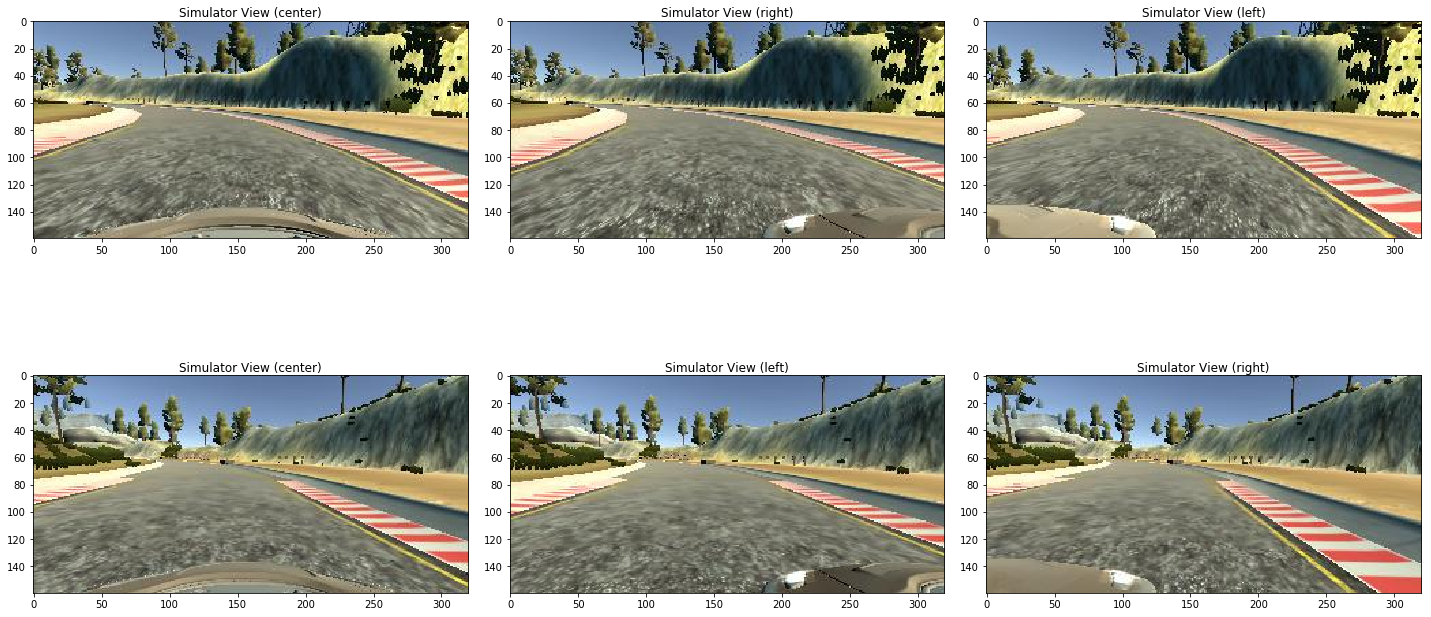

In [9]:

   
f, ((ax1, ax2, ax3), (ax4,ax5, ax6)) = plt.subplots(2, 3, figsize=(20, 10))
f.tight_layout()

ax1.imshow(images_center[0])
ax1.set_title('Simulator View (center)', fontsize=12)

ax2.imshow(images_left[0])
ax2.set_title('Simulator View (right)', fontsize=12)

ax3.imshow(images_right[0])
ax3.set_title('Simulator View (left)', fontsize=12)

ax4.imshow(images_center[200])
ax4.set_title('Simulator View (center)', fontsize=12)

ax5.imshow(images_left[200])
ax5.set_title('Simulator View (left)', fontsize=12)

ax6.imshow(images_right[200])
ax6.set_title('Simulator View (right)', fontsize=12)


In [ ]:

   
f, ((ax1, ax2, ax3), (ax4,ax5, ax6)) = plt.subplots(2, 3, figsize=(20,5))
f.tight_layout()

ax1.imshow(images_center[0][60:140,:])
ax1.set_title('Simulator View (center)', fontsize=12)

ax2.imshow(images_left[0][60:140,:])
ax2.set_title('Simulator View (right)', fontsize=12)

ax3.imshow(images_right[0][60:140,:])
ax3.set_title('Simulator View (left)', fontsize=12)

ax4.imshow(images_center[200][60:140,:])
ax4.set_title('Simulator View (center)', fontsize=12)

ax5.imshow(images_left[200][60:140,:])
ax5.set_title('Simulator View (left)', fontsize=12)
ax6.imshow(images_right[200][60:140,:])
ax6.set_title('Simulator View (right)', fontsize=12)


In [ ]:
flip_image = np.fliplr(images_center[0])
plt.imshow(flip_image)

In [ ]:
from keras.models import Sequential
from keras.layers import Flatten, Dense, Lambda,Dropout,Cropping2D
from keras.layers.convolutional import Convolution2D
from keras.layers.pooling import MaxPooling2D